In [1]:
import os
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm
sys.path.insert(0, '../../../icenumerics/')
sys.path.insert(0, './../auxnumerics/')
sys.path.insert(0, '../')
import icenumerics as ice


from parameters import params
import auxiliary as aux
import montecarlo_colloids as mc
import vertices as vrt

ureg = ice.ureg

%reload_ext autoreload
%autoreload 2

idx = pd.IndexSlice

In [2]:
plt.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
    'xtick.labelsize':15,
    'ytick.labelsize':15,
    'axes.labelsize':20,
})

# Hello

In [3]:
DRIVE = '/home/frieren/BIG/'
PROJECT = 'reentrancy/test11'
SIZE = 10
DATA_PATH = os.path.join(DRIVE,PROJECT,str(SIZE))

In [24]:
data = pd.read_csv(os.path.join(DATA_PATH,'kappa.csv'))
data['theta'] = data.t * np.pi/2/data.total_time * 180/np.pi

In [31]:
averaged = pd.DataFrame(data.groupby(['total_time','theta'])['kappa'].mean()).reset_index()
averaged['omega'] = np.pi/2/averaged.total_time
averaged

,total_time,theta,kappa,omega
0,1,0.0000,0.0,1.570796
1,1,4.5000,0.0,1.570796
2,1,9.0000,0.0,1.570796
3,1,13.5000,0.0,1.570796
4,1,18.0000,0.0,1.570796
...,...,...,...,...
33395,1000,89.9775,-142.8,0.001571
33396,1000,89.9820,-142.8,0.001571
33397,1000,89.9865,-145.2,0.001571
33398,1000,89.9910,-143.2,0.001571


In [33]:
ws = averaged.omega.unique()
ws = ws[ws<=0.4]

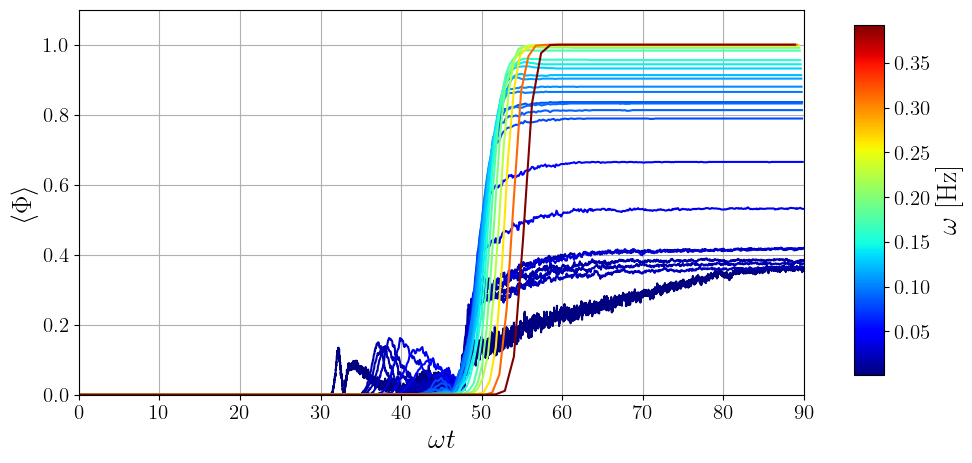

In [44]:
fig, ax = plt.subplots(figsize = (10,5))


norm = plt.Normalize(min(ws),max(ws))
cmap = plt.get_cmap('jet')


for w, dfw in averaged.groupby('omega'):
    if w in ws:
        
        ax.plot(dfw.theta, np.abs(dfw.kappa) / 400 , color=cmap(norm(w)))

ax.grid()
ax.set_xlim(0,90)
ax.set_ylim(0,1.1)
ax.set_xlabel('$\\omega t$')
ax.set_ylabel('$\\langle \\Phi \\rangle$')

fig.subplots_adjust(right=0.85)  # Adjust the right space to make room for the colorbar
cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.7])  # [left, bottom, width, height] for the colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label(label='$\\omega$ [Hz]',fontsize=20)
cbar.ax.tick_params(labelsize=15) 

plt.show()